<div style="background: #fffbe6; border-left: 6px solid #ffcc00; padding: 20px 25px; border-radius: 10px; font-family: 'Segoe UI', sans-serif; color: #333; margin: 20px 0; box-shadow: 0 2px 6px rgba(0,0,0,0.05);">

  <h2 style="margin-top: 0; color: #d48806;">📌 Important Note</h2>

  <p style="font-size: 16px; line-height: 1.6;">
    This tutorial demonstrates the <strong>original style transfer algorithm</strong>, which works by 
    <em>iteratively optimizing</em> the image to match the content and style.
  </p>

  <p style="font-size: 16px; line-height: 1.6;">
    In contrast, <strong>modern approaches</strong> use pretrained models (e.g., similar to 
    <code>CycleGAN</code>) that can generate stylized images in a <strong>single forward pass</strong>, 
    making them significantly faster — often up to <strong>1000x</strong> more efficient.
  </p>

  <p style="font-size: 16px; line-height: 1.6;">
    These newer methods are ideal for <em>real-time applications</em> and are widely used in creative tools and mobile apps.
  </p>

</div>


<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; padding: 20px; line-height: 1.7; background: #f9f9f9; border-radius: 10px; box-shadow: 0 2px 8px rgba(0,0,0,0.05);">

  <h2 style="color: #4a90e2; margin-top: 0;">🎨 Neural Style Transfer Overview</h2>

  <p>
    <strong>Neural style transfer</strong> is an optimization technique that blends two images:
    a <em>content image</em> and a <em>style image</em> (e.g., a famous painting). The resulting output image
    preserves the content of the first image while adopting the visual style of the second.
  </p>

  <p>
    The algorithm works by optimizing an output image so that it matches the 
    <strong>content features</strong> of the content image and the <strong>style features</strong> of the style image.
    These features are extracted using a pretrained <strong>convolutional neural network (CNN)</strong>.
  </p>

  <hr style="border: none; border-top: 1px solid #ddd; margin: 20px 0;">

  <h3 style="color: #333;">🚀 Explore Implementations</h3>

  <ul style="padding-left: 20px;">
    <li>
      <strong>Fast Style Transfer (TensorFlow Hub):</strong><br>
      A simple application using a pretrained model for arbitrary image stylization.<br>
      👉 <a href="https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization" target="_blank">Tutorial Link</a>
    </li>
    <br>
    <li>
      <strong>Artistic Style Transfer (TensorFlow Lite):</strong><br>
      Lightweight implementation optimized for mobile and edge devices.<br>
     
    </li>
  </ul>

  <blockquote style="background: #eef7ff; border-left: 5px solid #4a90e2; padding: 15px; margin-top: 30px;">
    <em>✨ Style transfer combines the content of one image with the artistic touch of another — creating AI-generated art that’s both expressive and unique.</em>
  </blockquote>

</div>


# DownLoad Content Image & Style Image

In [4]:
! wget https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg

--2025-04-07 11:53:10--  https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2833605 (2.7M) [image/jpeg]
Saving to: ‘Cat_November_2010-1a.jpg.1’

Cat_November_2010-1 100%[===================>]   2.70M  3.78MB/s    in 0.7s    

2025-04-07 11:53:13 (3.78 MB/s) - ‘Cat_November_2010-1a.jpg.1’ saved [2833605/2833605]



In [5]:
! wget https://thumbs.dreamstime.com/b/green-nature-forest-landscape-scenery-banner-background-paper-ar-green-nature-forest-landscape-scenery-banner-background-paper-art-115186384.jpg

--2025-04-07 11:53:13--  https://thumbs.dreamstime.com/b/green-nature-forest-landscape-scenery-banner-background-paper-ar-green-nature-forest-landscape-scenery-banner-background-paper-art-115186384.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 151.101.193.91, 151.101.65.91, 151.101.129.91, ...
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|151.101.193.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21753 (21K) [image/jpeg]
Saving to: ‘green-nature-forest-landscape-scenery-banner-background-paper-ar-green-nature-forest-landscape-scenery-banner-background-paper-art-115186384.jpg.1’

green-nature-forest 100%[===================>]  21.24K  --.-KB/s    in 0.001s  

2025-04-07 11:53:13 (26.7 MB/s) - ‘green-nature-forest-landscape-scenery-banner-background-paper-ar-green-nature-forest-landscape-scenery-banner-background-paper-art-115186384.jpg.1’ saved [21753/21753]



# Setup

In [6]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import numpy as np
import PIL.Image
import time
from io import BytesIO
import functools
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from IPython.display import display, clear_output
from tqdm import tqdm
import IPython.display as display
import time
%matplotlib inline

#  function that transforms a tensor to image

In [7]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

# Load Content & Style Images

In [8]:
content_path = '/kaggle/working/Cat_November_2010-1a.jpg'
style_path = '/kaggle/working/green-nature-forest-landscape-scenery-banner-background-paper-ar-green-nature-forest-landscape-scenery-banner-background-paper-art-115186384.jpg'


# Visualize the input
* Define a function to load an image and limit its maximum dimension to 512 pixels.

In [9]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

# Create a simple function to display an image:

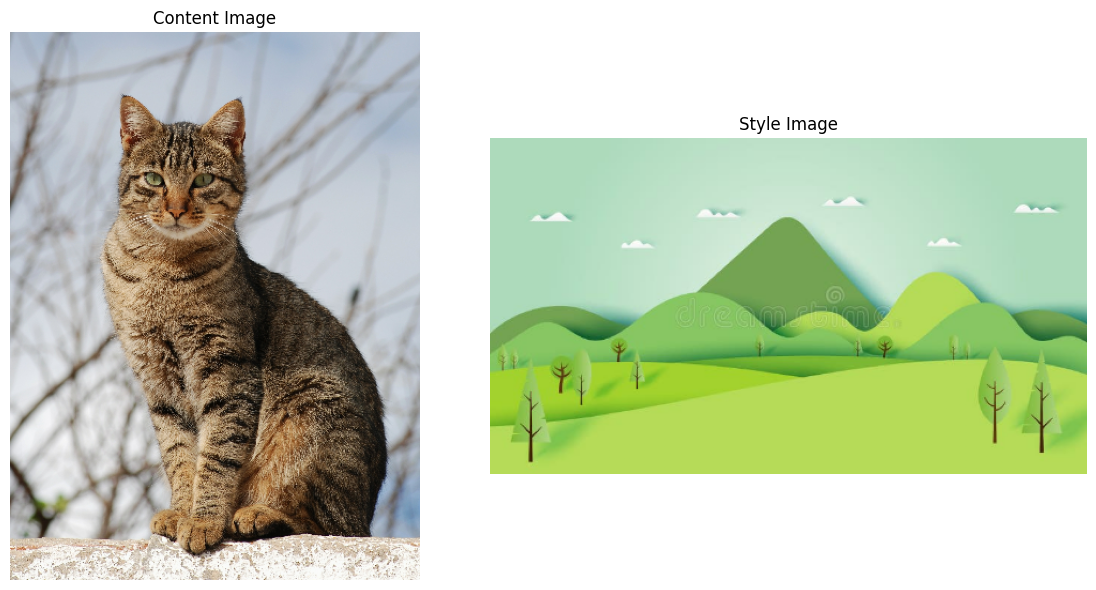

In [10]:
def imshow(ax, image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    ax.imshow(image)
    if title:
        ax.set_title(title)
    ax.axis('off')

content_image = load_img(content_path)
style_image = load_img(style_path)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

imshow(axes[0], content_image, 'Content Image')
imshow(axes[1], style_image, 'Style Image')

plt.tight_layout()
plt.show()


# Fast Style Transfer using TF-Hub

This tutorial demonstrates the original style-transfer algorithm, which optimizes the image content to a particular style. Before getting into the details, let's see how the [TensorFlow Hub model](https://www.kaggle.com/models/google/arbitrary-image-stylization-v1/tensorFlow1/256/2?tfhub-redirect=true) does this:

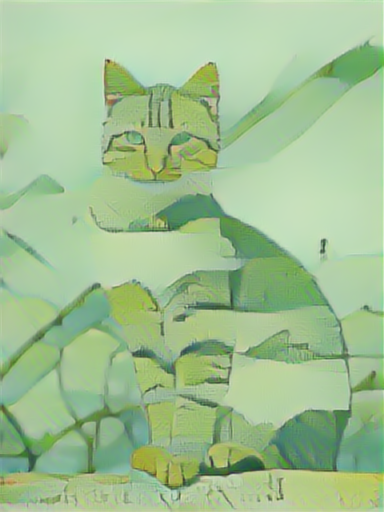

In [11]:

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

# Define content and style representations

#### **Use the intermediate layers of the model to get the content and style representations of the image. Starting from the network's input layer, the first few layer activations represent low-level features like edges and textures. As you step through the network, the final few layers represent higher-level features—object parts like wheels or eyes. In this case, you are using the VGG19 network architecture, a pretrained image classification network. These intermediate layers are necessary to define the representation of content and style from the images. For an input image, try to match the corresponding style and content target representations at these intermediate layers.**

# Preprocess the content image for InceptionV3


In [12]:
x = tf.keras.applications.resnet50.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
resnet50 = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')
prediction_probabilities = resnet50(x)
prediction_probabilities.shape

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


TensorShape([1, 1000])

In [13]:
predicted_top_5 = tf.keras.applications.resnet50.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[('tiger_cat', 0.377683),
 ('tabby', 0.33118373),
 ('Egyptian_cat', 0.13073905),
 ('plastic_bag', 0.032461006),
 ('lynx', 0.008784035)]

In [14]:
resnet50 = tf.keras.applications.ResNet50(include_top=False, weights='imagenet')

for layer in resnet50.layers:
    print(f"Layers Name : {layer.name}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Layers Name : input_layer_1
Layers Name : conv1_pad
Layers Name : conv1_conv
Layers Name : conv1_bn
Layers Name : conv1_relu
Layers Name : pool1_pad
Layers Name : pool1_pool
Layers Name : conv2_block1_1_conv
Layers Name : conv2_block1_1_bn
Layers Name : conv2_block1_1_relu
Layers Name : conv2_block1_2_conv
Layers Name : conv2_block1_2_bn
Layers Name : conv2_block1_2_relu
Layers Name : conv2_block1_0_conv
Layers Name : conv2_block1_3_conv
Layers Name : conv2_block1_0_bn
Layers Name : conv2_block1_3_bn
Layers Name : conv2_block1_add
Layers Name : conv2_block1_out
Layers Name : conv2_block2_1_conv
Layers Name : conv2_block2_1_bn
Layers Name : conv2_block2_1_relu
Layers Name : conv2_block2_2_conv
Layers Name : conv2_block2_2_bn
Layers Name : conv2_block2_2_relu
Layers Name : conv2_block2_3_conv
Layers Name : conv2_block2_3_bn
Layers Name : conv2_block2_add
Layers Name : conv2_block2_out
Layers Name : conv2_block3_1_conv
Layers Name : conv2

# Choose intermediate layers from the network to represent the style and content of the image:

# Intermediate layers for style and content
* So why do these intermediate outputs within our pretrained image classification network allow us to define style and content representations?

* At a high level, in order for a network to perform image classification (which this network has been trained to do), it must understand the image. This requires taking the raw image as input pixels and building an internal representation that converts the raw image pixels into a complex understanding of the features present within the image.

* This is also a reason why convolutional neural networks are able to generalize well: they’re able to capture the invariances and defining features within classes (e.g. cats vs. dogs) that are agnostic to background noise and other nuisances. Thus, somewhere between where the raw image is fed into the model and the output classification label, the model serves as a complex feature extractor. By accessing intermediate layers of the model, you're able to describe the content and style of input images.

In [15]:
content_layers = ['conv4_block6_out'] 

style_layers = ['conv1_conv','conv2_block3_out','conv3_block4_out','conv4_block6_out','conv5_block3_out']
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

# Build the model

In [16]:
def resnet50_layers(layer_names):
  """ Creates a VGG model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on ImageNet data
  resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet')
  resnet.trainable = False

  outputs = [resnet.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([resnet.input], outputs)
  return model

# Look at the statistics of each layer's output

In [17]:
style_image_resized = tf.image.resize(style_image, [224, 224])
style_extractor = resnet50_layers(style_layers)
style_outputs = style_extractor(style_image_resized*255)


for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

conv1_conv
  shape:  (1, 112, 112, 64)
  min:  -1127.0148
  max:  1405.6924
  mean:  -13.483143

conv2_block3_out
  shape:  (1, 56, 56, 256)
  min:  0.0
  max:  16.836441
  mean:  1.1015326

conv3_block4_out
  shape:  (1, 28, 28, 512)
  min:  0.0
  max:  16.379438
  mean:  0.81789446

conv4_block6_out
  shape:  (1, 14, 14, 1024)
  min:  0.0
  max:  22.418484
  mean:  0.59802085

conv5_block3_out
  shape:  (1, 7, 7, 2048)
  min:  0.0
  max:  38.6605
  mean:  0.5160988



# **Calculate style**

* **The content of an image is represented by the values of the intermediate feature maps.It turns out,the style of an image can be described by the means and correlations across the different feature maps.** 

* **We can use this to calculate a **Gram matrix** that includes this information by taking the outer product of the feature vector with itself at each location, and averaging that outer product over all locations. This Gram matrix can be calculated for a particular layer as:**

$$G^l_{cd} = \frac{\sum_{ij} F^l_{ijc}(x)F^l_{ijd}(x)}{IJ}$$

### This can be implemented concisely using the `tf.linalg.einsum` function:

In [18]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

# Extract style and content
* Build a model that returns the style and content tensors.

In [19]:
class StyleContentModel(tf.keras.models.Model):
    
    def __init__(self, style_layers, content_layers):
        
        super(StyleContentModel, self).__init__()
        self.resnet50 = resnet50_layers(style_layers + content_layers)  # Corrected function name
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.resnet50.trainable = False

    def call(self, inputs):
        
        """Expects float input in [0,1]"""
        # Resize input to match ResNet50's expected shape: (None, 224, 224, 3)
        inputs = tf.image.resize(inputs, [224, 224])  # Changed from 299x299
        inputs = inputs * 255.0
        # Use ResNet50 preprocessing
        preprocessed_input = tf.keras.applications.resnet50.preprocess_input(inputs)
        outputs = self.resnet50(preprocessed_input)
        style_outputs, content_outputs = (outputs[:self.num_style_layers],outputs[self.num_style_layers:])

        style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

        content_dict = {content_name: value for content_name, value in zip(self.content_layers, content_outputs)}
        style_dict = {style_name: value for style_name, value in zip(self.style_layers, style_outputs)}

        return {'content': content_dict, 'style': style_dict}

### When called on an image, this model returns the gram matrix (style) of the style_layers and content of the content_layers:

In [20]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())

Styles:
   conv1_conv
    shape:  (1, 64, 64)
    min:  -82745.43
    max:  100059.93
    mean:  25.033392

   conv2_block3_out
    shape:  (1, 256, 256)
    min:  0.00076567085
    max:  11.8589115
    mean:  0.82617384

   conv3_block4_out
    shape:  (1, 512, 512)
    min:  0.0018446958
    max:  8.700782
    mean:  0.65747106

   conv4_block6_out
    shape:  (1, 1024, 1024)
    min:  0.0
    max:  13.676781
    mean:  0.25590837

   conv5_block3_out
    shape:  (1, 2048, 2048)
    min:  0.0
    max:  127.42392
    mean:  0.10593112

Contents:
   conv4_block6_out
    shape:  (1, 14, 14, 1024)
    min:  0.0
    max:  15.849375
    mean:  0.5008884


# Run gradient descent
* With this style and content extractor, you can now implement the style transfer algorithm. Do this by calculating the mean square error for your image's output relative to each target, then take the weighted sum of these losses.

### Set your style and content target values:

In [21]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

### **Define a tf.Variable to contain the image to optimize. To make this quick, initialize it with the content image (the tf.Variable must be the same shape as the content image):**

In [22]:
image = tf.Variable(content_image)

# Since this is a float image, define a function to keep the pixel values between 0 and 1:

In [23]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

# Create an optimizer. The paper recommends LBFGS, but Adam works okay, too:

In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.99, epsilon=1e-1)

# To optimize this, use a weighted combination of the two losses to get the total loss:

In [25]:
style_weight=1e-2
content_weight=1e2

In [26]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

# Use tf.GradientTape to update the image.

In [27]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  optimizer.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

# Now run a few steps to test:

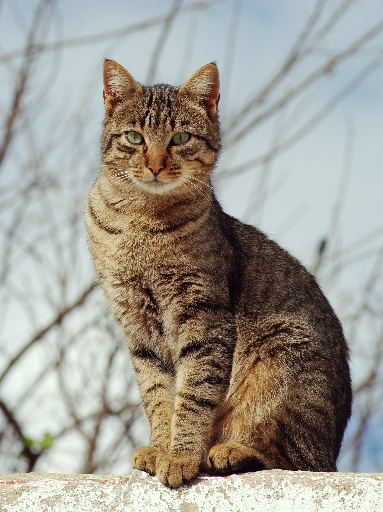

In [28]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

#  Perform a longer optimization:

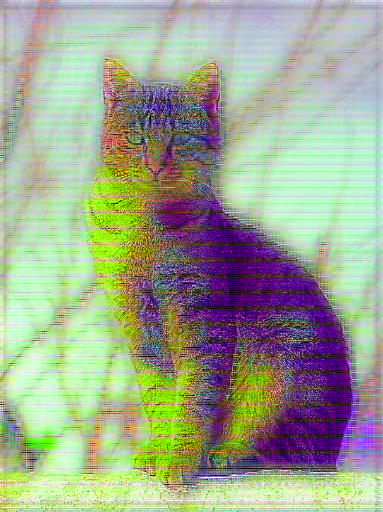

Epochs: 100%|██████████| 10/10 [00:16<00:00,  1.65s/it]

Train step: 1000
Total time: 16.5


In [29]:
from IPython.display import display, clear_output

start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in tqdm(range(epochs), desc="Epochs", position=0):
    for m in tqdm(range(steps_per_epoch), desc=f"Steps (Epoch {n+1})",leave=False, position=1):
        step += 1
        train_step(image)
    clear_output(wait=True)
    display(tensor_to_image(image))  # Now correctly calling display
    print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end - start))


# Total variation loss
* One downside to this basic implementation is that it produces a lot of high frequency artifacts. Decrease these using an explicit regularization term on the high frequency components of the image. In style transfer, this is often called the total variation loss:



In [30]:
def high_pass_x_y(image):
    
  x_var = image[:, :, 1:, :] - image[:, :, :-1, :]
  y_var = image[:, 1:, :, :] - image[:, :-1, :, :]

  return x_var, y_var

In [31]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

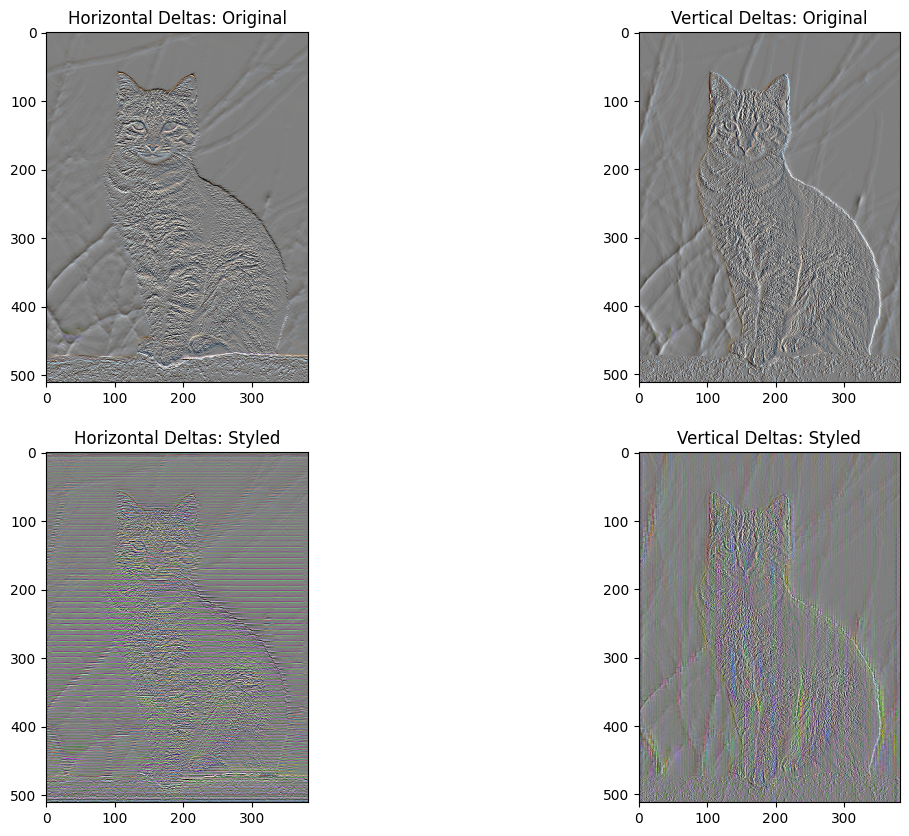

In [32]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2, 2, 2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2, 2, 3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2, 2, 4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")

# This shows how the high frequency components have increased.

#### Also, this high frequency component is basically an edge-detector. You can get similar output from the Sobel edge detector, for example:

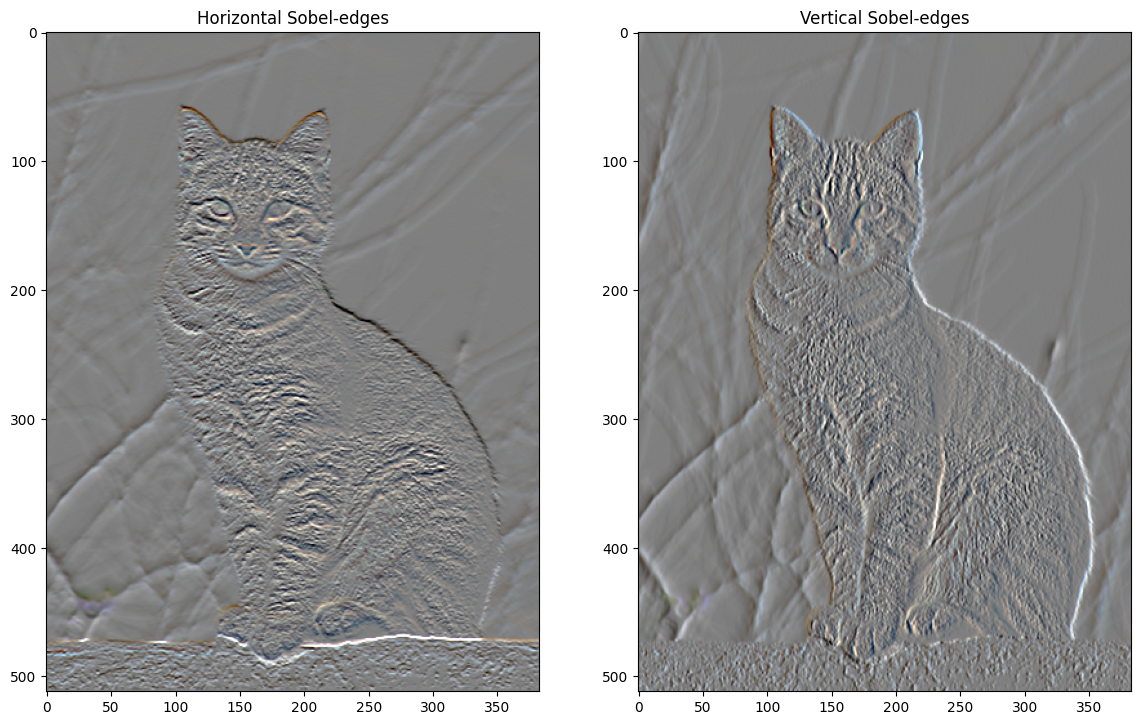

In [33]:
plt.figure(figsize=(14, 10))

sobel = tf.image.sobel_edges(content_image)
plt.subplot(1, 2, 1)
imshow(clip_0_1(sobel[..., 0]/4+0.5), "Horizontal Sobel-edges")
plt.subplot(1, 2, 2)
imshow(clip_0_1(sobel[..., 1]/4+0.5), "Vertical Sobel-edges")

# The regularization loss associated with this is the sum of the squares of the values:

In [34]:
def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

In [35]:
total_variation_loss(image).numpy()

88018.625

In [36]:
tf.image.total_variation(image).numpy()

array([88018.625], dtype=float32)

# Re-run the optimization

In [37]:
total_variation_weight=30

# train Step

In [38]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  optimizer.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

# Reinitialize the image-variable and the optimizer:

In [39]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
image = tf.Variable(content_image)

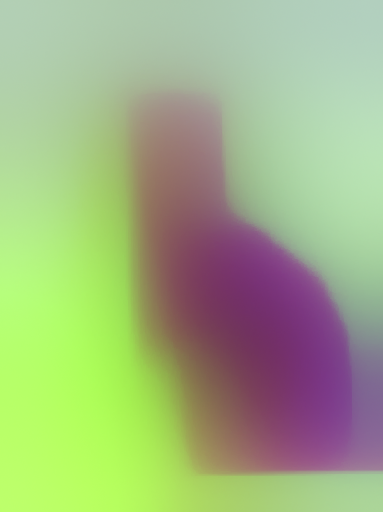

Train step: 1000
Total time: 22.3


In [40]:
import time
from tqdm.notebook import tqdm
from IPython.display import display, clear_output



start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in tqdm(range(epochs), desc="Epochs"):
    for m in tqdm(range(steps_per_epoch), desc=f"Steps (Epoch {n+1})", leave=False):
        step += 1
        train_step(image)
    clear_output(wait=True)
    display(tensor_to_image(image))
    print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end - start))
